In [27]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import FastICA, PCA

In [2]:
sago = sca.savitzky_golay([1001, 1004, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013,
                          1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],
                          21,11,2,3)

In [3]:
df = sago.get_aligned_signal_componets()

x range: 4.0 222.0


In [257]:

fi = FastICA(n_components=20, max_iter=10000,tol=0.000001)
pc = PCA(n_components=30)

In [258]:
sg = np.vstack([df[c] for c in df.columns if c[1].startswith("Sg_")])


In [259]:
x = fi.fit_transform(sg.T)

In [260]:
x.shape

(437, 20)

In [261]:
y = x[:,np.argsort(np.abs(x).argmax(axis=0))]
y=y*np.sign((y**7).sum(axis=0))

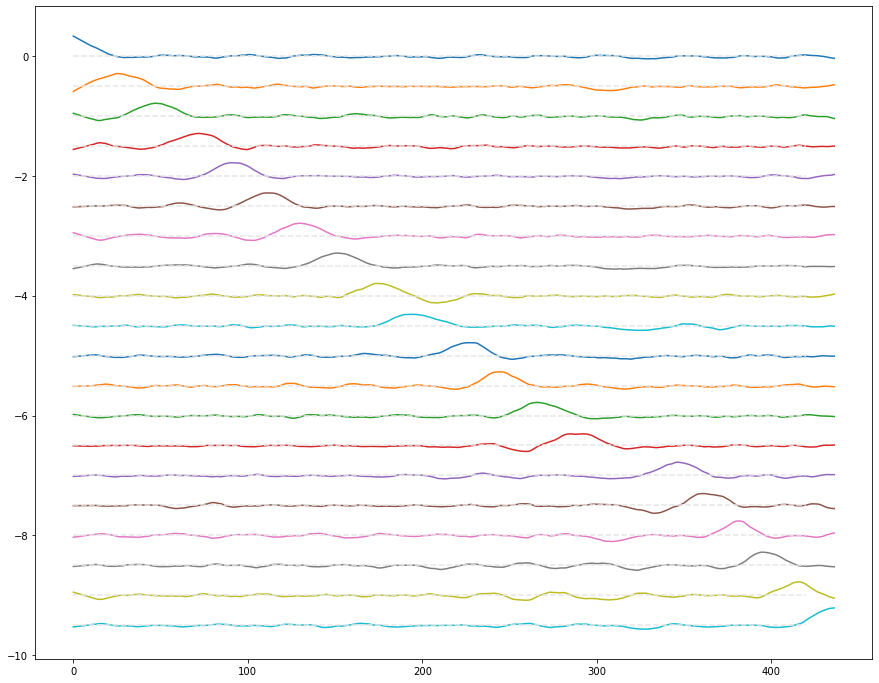

In [262]:
plt.figure(figsize=(15,12))
for i in range(20):
    plt.plot(y[:,i]-i/2)
    plt.plot([0., 420.], [-i/2., -i/2], '--', color=[0.9, 0.9, 0.9])

In [54]:
fnorm = lambda m: (m**2).sum()

In [55]:
m=(x.T @ x - np.eye(30))
fnorm(m)

4.0916536661380604e-26

In [86]:
x1.shape

(437, 30)

In [147]:
fnorm(((sg @ x)@x.T)-sg)/ fnorm(sg)

0.045225103006339036

In [142]:
x1 = x[:,:10]
fnorm(((sg @ x1)@x1.T)-sg)/ fnorm(sg)

0.18073640080184428

In [169]:
(sg @ y).shape

(60, 20)

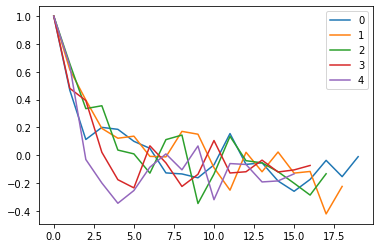

In [179]:
sg_comp_corr = np.corrcoef((sg@y).T)

for i in range(5):
    plt.plot(sg_comp_corr[i,i:])
    
plt.legend([str(i) for i in range(5)])

In [226]:
r = pc.fit_transform(X=res.T)

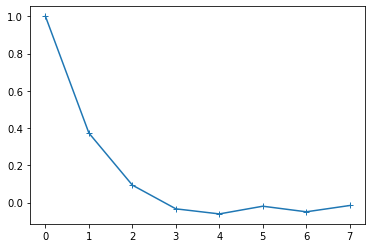

In [227]:
plt.plot([np.diag(sg_comp_corr,i).mean() for i in range(8)],'+-')
#plt.plot(0.32**np.linspace(0,7,8))

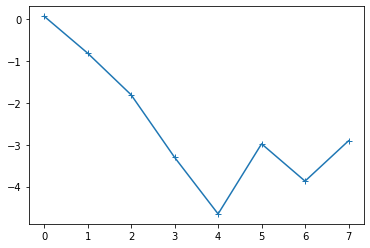

In [228]:
plt.plot([np.log((np.diag(sg_comp_corr,i)).mean()+0.07) for i in range(8)],'+-')
#plt.plot(0.32**np.linspace(0,7,8))

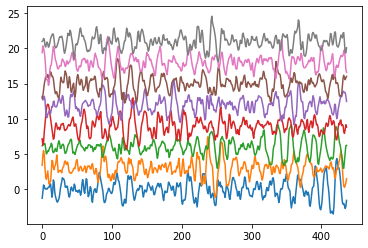

In [230]:
for i in range(8):
    plt.plot(r[:,i]+i*3)

In [67]:
r.shape

(437, 10)

In [79]:
rz = zscore(r,axis=0)/np.sqrt(437)

In [82]:
rz.T @ rz
fnorm(rz.T @ rz-np.eye(10))

6.121479509351049e-30

In [83]:

fnorm(((sg @ rz)@rz.T)-sg)/ fnorm(sg)

0.18073640080184428

In [87]:
sg.shape

(60, 437)

In [231]:
comp = sg @ y
comp.shape

(60, 20)

In [109]:
print(np.array2string(np.sort(comp.mean(axis=1))[::-1],precision=3, suppress_small=True))

[ 0.583  0.507  0.464  0.405  0.364  0.332  0.315  0.309  0.263  0.186
  0.144  0.139  0.138  0.132  0.109  0.099  0.091  0.09   0.082  0.08
  0.078  0.069  0.069  0.065  0.064  0.055  0.04   0.    -0.021 -0.026
 -0.059 -0.07  -0.071 -0.078 -0.081 -0.136 -0.14  -0.142 -0.145 -0.146
 -0.151 -0.167 -0.168 -0.19  -0.19  -0.203 -0.23  -0.274 -0.278 -0.288
 -0.311 -0.329 -0.337 -0.424 -0.437 -0.476 -0.48  -0.486 -0.513 -0.567]


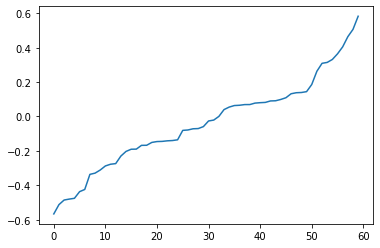

In [111]:
plt.plot(np.sort(comp.mean(axis=1)))

In [105]:
np.argsort(comp.std(axis=1))[::-1]

array([30, 47, 11, 10, 35,  6, 58,  8, 29, 39, 56, 38, 15, 22, 37, 55, 17,
       33, 48, 25, 40, 51,  0, 57, 52, 13,  5,  7, 20, 27, 34, 31, 46, 16,
       53, 43, 14,  9, 45, 36, 41, 23, 42, 24, 26, 21, 32, 12,  4, 44,  2,
        3, 50, 49, 18, 54, 19, 59,  1, 28])

In [112]:
100/(4*44)

0.5681818181818182

In [113]:
30/52


0.5769230769230769

In [151]:
res = np.vstack([df[c] for c in df.columns if c[1].startswith("resid_")])


In [265]:
fi1 = FastICA(n_components=30, max_iter=10000,tol=1e-8)
r = fi1.fit_transform(res.T)

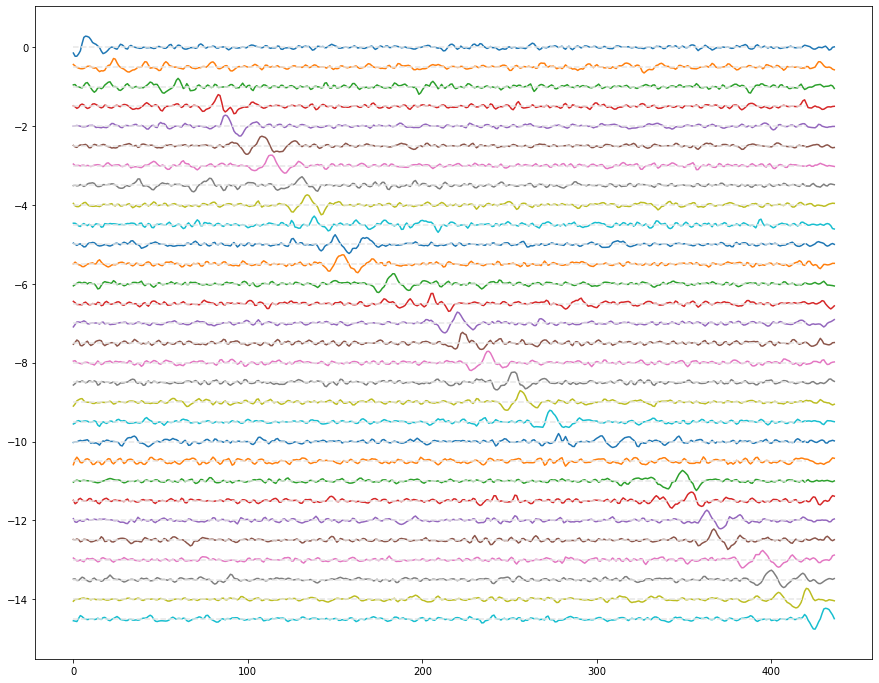

In [266]:
yr = r[:,np.argsort(np.abs(r).argmax(axis=0))]
yr=yr*np.sign((yr**7).sum(axis=0))

plt.figure(figsize=(15,12))
for i in range(30):
    plt.plot(yr[:,i]-i/2)
    plt.plot([0., 420.], [-i/2., -i/2], '--', color=[0.9, 0.9, 0.9])

In [267]:
fnorm(((res @ r)@r.T)-res)/ fnorm(res)

0.16687396386967376

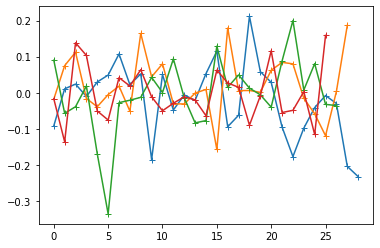

In [268]:
res_comp_corr = np.corrcoef((res@yr).T)

for i in range(1,5):
    plt.plot(np.diag(res_comp_corr,i) ,'+-')


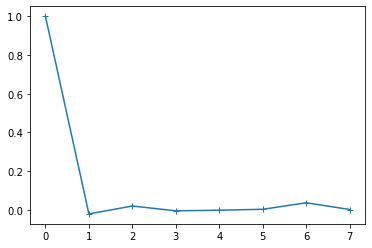

In [270]:
plt.plot([np.diag(res_comp_corr,i).mean() for i in range(8)],'+-')


In [210]:
np.set_printoptions(precision=4, suppress=True, floatmode='fixed')

In [211]:
res_comp_corr

array([[ 1.0000, -0.1277,  0.0361, -0.0111,  0.1056, -0.0639,  0.0445,
         0.0081,  0.1982, -0.0141, -0.0769, -0.0260,  0.0564,  0.0649,
         0.0599, -0.1309, -0.1477,  0.0690, -0.1208,  0.0178, -0.0030,
        -0.0230, -0.0504,  0.0037,  0.0226,  0.0067, -0.0035,  0.0167,
        -0.0404, -0.0368],
       [-0.1277,  1.0000,  0.0368,  0.0761,  0.1848,  0.0100, -0.1006,
        -0.0821,  0.0977,  0.0103, -0.1023, -0.1375,  0.0975,  0.0123,
         0.0371,  0.1051, -0.0859, -0.0654,  0.0123, -0.0628,  0.0164,
         0.0828, -0.0738,  0.1055, -0.1461,  0.0216, -0.1001,  0.0031,
         0.0592,  0.0669],
       [ 0.0361,  0.0368,  1.0000,  0.1481,  0.1561,  0.0356,  0.0836,
         0.0788, -0.0393, -0.0255, -0.0741, -0.1739, -0.0404,  0.0794,
        -0.0084, -0.0023, -0.0022,  0.1261, -0.0109,  0.1179, -0.2120,
        -0.0866,  0.1331,  0.0367, -0.1325,  0.0221, -0.0122, -0.0470,
         0.0049,  0.0038],
       [-0.0111,  0.0761,  0.1481,  1.0000,  0.0276,  0.0977, -0.07

In [165]:
(res @r).std(axis=0)

array([2.2540965 , 2.14484598, 2.39871562, 2.40214525, 2.47360033,
       2.17823749, 2.54402951, 2.17073592, 2.03238716, 2.45893748,
       2.17836026, 2.0493348 , 2.53981155, 2.26804813, 2.33060293,
       2.22923345, 2.48583108, 2.50415688, 2.45407961, 2.22601507,
       2.42925901, 2.45362253, 2.51104612, 2.51817923, 2.76757858,
       2.15906873, 2.28939495, 2.21711044, 2.49104404, 2.29024147])

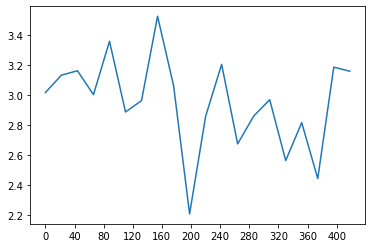

In [225]:
plt.plot(np.arange(0,440,22),(sg @y).std(axis=0))
plt.xticks(np.arange(0,440,40));

<AxesSubplot:>

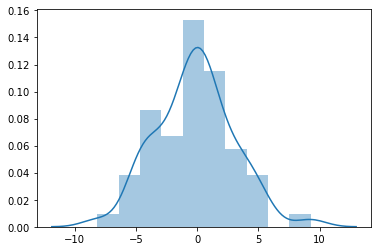

In [238]:
sns.distplot(comp[:,19])

In [244]:
a = pc.fit_transform(sg.T)
a = a/np.sqrt(437)
a.shape

(437, 30)

In [249]:
fnorm(np.corrcoef(a.T)-np.eye(30))

3.4470821952916685e-29

In [250]:
comp_pca = sg @a
comp_pca.shape

(60, 30)

<AxesSubplot:>

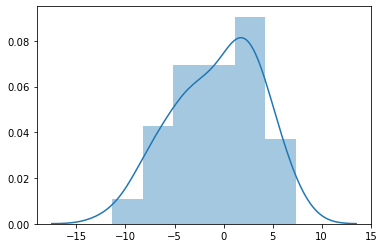

In [256]:
sns.distplot(comp_pca[:,5])

In [275]:
# calculate the length (in samples) of the longest run in each signal
# without a sign flip (i.e. without crossing zero)
wl= np.zeros(20)
for i in range(20):
    wl[i]=(np.diff(                        # get gap between consecutive indices matching condition
        np.arange(436)[                    # get the indexes
            np.diff(np.sign(y[:,i])) !=0   # sign flip
        ])).max()     

wl,np.sort(wl)

(array([39.0000, 89.0000, 41.0000, 61.0000, 46.0000, 59.0000, 44.0000,
        55.0000, 40.0000, 52.0000, 55.0000, 44.0000, 53.0000, 76.0000,
        42.0000, 35.0000, 41.0000, 34.0000, 35.0000, 56.0000]),
 array([34.0000, 35.0000, 35.0000, 39.0000, 40.0000, 41.0000, 41.0000,
        42.0000, 44.0000, 44.0000, 46.0000, 52.0000, 53.0000, 55.0000,
        55.0000, 56.0000, 59.0000, 61.0000, 76.0000, 89.0000]))